## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   8.647674   165.417977  0.854421   3.873250  1.260482
1  37.192808   279.719107  0.732432   4.207149  1.367314
2  34.505503   437.244129  0.341535  10.997321  1.382518
3  35.314720  1307.677271  0.805675   7.069839  1.772969
4   9.952773   531.560950  0.541108   7.833042  1.554222


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0652791	total: 57.4ms	remaining: 57.3s
1:	learn: 1.0547924	total: 58.1ms	remaining: 29s
2:	learn: 1.0459115	total: 58.9ms	remaining: 19.6s
3:	learn: 1.0368229	total: 59.4ms	remaining: 14.8s
4:	learn: 1.0273514	total: 59.9ms	remaining: 11.9s
5:	learn: 1.0164610	total: 60.4ms	remaining: 10s
6:	learn: 1.0074484	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9959538	total: 61.4ms	remaining: 7.61s
8:	learn: 0.9866829	total: 62ms	remaining: 6.82s
9:	learn: 0.9769756	total: 62.4ms	remaining: 6.18s
10:	learn: 0.9683393	total: 63ms	remaining: 5.66s
11:	learn: 0.9592964	total: 63.5ms	remaining: 5.23s
12:	learn: 0.9512630	total: 63.9ms	remaining: 4.85s
13:	learn: 0.9412099	total: 64.4ms	remaining: 4.53s
14:	learn: 0.9306361	total: 64.8ms	remaining: 4.25s
15:	learn: 0.9235707	total: 65.3ms	remaining: 4.01s
16:	learn: 0.9150819	total: 65.8ms	remaining: 3.8s
17:	learn: 0.9072340	total: 66.1ms	remaining: 3.61s
18:	learn: 0.8991560	total: 66.6ms	remaining: 3.44s
1

110:	learn: 0.4531950	total: 106ms	remaining: 850ms
111:	learn: 0.4506183	total: 107ms	remaining: 847ms
112:	learn: 0.4484209	total: 108ms	remaining: 847ms
113:	learn: 0.4454916	total: 108ms	remaining: 841ms
114:	learn: 0.4425511	total: 109ms	remaining: 836ms
115:	learn: 0.4400674	total: 109ms	remaining: 832ms
116:	learn: 0.4372626	total: 110ms	remaining: 827ms
117:	learn: 0.4350375	total: 110ms	remaining: 823ms
118:	learn: 0.4322148	total: 110ms	remaining: 817ms
119:	learn: 0.4292512	total: 111ms	remaining: 811ms
120:	learn: 0.4268129	total: 111ms	remaining: 807ms
121:	learn: 0.4249032	total: 111ms	remaining: 801ms
122:	learn: 0.4226371	total: 112ms	remaining: 798ms
123:	learn: 0.4205412	total: 112ms	remaining: 794ms
124:	learn: 0.4178832	total: 113ms	remaining: 789ms
125:	learn: 0.4158252	total: 113ms	remaining: 784ms
126:	learn: 0.4139845	total: 113ms	remaining: 780ms
127:	learn: 0.4126540	total: 114ms	remaining: 775ms
128:	learn: 0.4095978	total: 114ms	remaining: 770ms
129:	learn: 

295:	learn: 0.2341078	total: 186ms	remaining: 442ms
296:	learn: 0.2338358	total: 187ms	remaining: 441ms
297:	learn: 0.2335090	total: 187ms	remaining: 440ms
298:	learn: 0.2332041	total: 187ms	remaining: 439ms
299:	learn: 0.2325038	total: 188ms	remaining: 438ms
300:	learn: 0.2320373	total: 188ms	remaining: 437ms
301:	learn: 0.2316450	total: 189ms	remaining: 436ms
302:	learn: 0.2313110	total: 189ms	remaining: 435ms
303:	learn: 0.2310752	total: 189ms	remaining: 434ms
304:	learn: 0.2302411	total: 190ms	remaining: 432ms
305:	learn: 0.2300025	total: 190ms	remaining: 431ms
306:	learn: 0.2297764	total: 190ms	remaining: 430ms
307:	learn: 0.2294744	total: 191ms	remaining: 428ms
308:	learn: 0.2287143	total: 191ms	remaining: 427ms
309:	learn: 0.2280508	total: 191ms	remaining: 426ms
310:	learn: 0.2275678	total: 192ms	remaining: 425ms
311:	learn: 0.2273476	total: 192ms	remaining: 424ms
312:	learn: 0.2271321	total: 193ms	remaining: 423ms
313:	learn: 0.2268994	total: 193ms	remaining: 422ms
314:	learn: 

533:	learn: 0.1341168	total: 289ms	remaining: 252ms
534:	learn: 0.1337801	total: 289ms	remaining: 251ms
535:	learn: 0.1336622	total: 290ms	remaining: 251ms
536:	learn: 0.1334126	total: 290ms	remaining: 250ms
537:	learn: 0.1332962	total: 291ms	remaining: 249ms
538:	learn: 0.1326250	total: 291ms	remaining: 249ms
539:	learn: 0.1325099	total: 291ms	remaining: 248ms
540:	learn: 0.1321831	total: 292ms	remaining: 248ms
541:	learn: 0.1320701	total: 292ms	remaining: 247ms
542:	learn: 0.1318266	total: 293ms	remaining: 246ms
543:	learn: 0.1311706	total: 293ms	remaining: 246ms
544:	learn: 0.1310587	total: 293ms	remaining: 245ms
545:	learn: 0.1309483	total: 294ms	remaining: 244ms
546:	learn: 0.1305402	total: 294ms	remaining: 244ms
547:	learn: 0.1304315	total: 295ms	remaining: 243ms
548:	learn: 0.1298084	total: 295ms	remaining: 242ms
549:	learn: 0.1296442	total: 295ms	remaining: 242ms
550:	learn: 0.1293811	total: 296ms	remaining: 241ms
551:	learn: 0.1291472	total: 296ms	remaining: 241ms
552:	learn: 

714:	learn: 0.0960969	total: 368ms	remaining: 147ms
715:	learn: 0.0958442	total: 368ms	remaining: 146ms
716:	learn: 0.0956242	total: 369ms	remaining: 146ms
717:	learn: 0.0954788	total: 369ms	remaining: 145ms
718:	learn: 0.0953003	total: 369ms	remaining: 144ms
719:	learn: 0.0950852	total: 370ms	remaining: 144ms
720:	learn: 0.0949154	total: 370ms	remaining: 143ms
721:	learn: 0.0947405	total: 370ms	remaining: 143ms
722:	learn: 0.0944926	total: 371ms	remaining: 142ms
723:	learn: 0.0944454	total: 371ms	remaining: 141ms
724:	learn: 0.0942349	total: 372ms	remaining: 141ms
725:	learn: 0.0940688	total: 372ms	remaining: 140ms
726:	learn: 0.0938973	total: 372ms	remaining: 140ms
727:	learn: 0.0936541	total: 373ms	remaining: 139ms
728:	learn: 0.0934057	total: 373ms	remaining: 139ms
729:	learn: 0.0932434	total: 373ms	remaining: 138ms
730:	learn: 0.0930758	total: 374ms	remaining: 138ms
731:	learn: 0.0929154	total: 374ms	remaining: 137ms
732:	learn: 0.0927568	total: 375ms	remaining: 137ms
733:	learn: 

951:	learn: 0.0607648	total: 471ms	remaining: 23.7ms
952:	learn: 0.0604962	total: 472ms	remaining: 23.3ms
953:	learn: 0.0604634	total: 472ms	remaining: 22.8ms
954:	learn: 0.0602011	total: 472ms	remaining: 22.3ms
955:	learn: 0.0601225	total: 473ms	remaining: 21.8ms
956:	learn: 0.0600374	total: 473ms	remaining: 21.3ms
957:	learn: 0.0599770	total: 474ms	remaining: 20.8ms
958:	learn: 0.0599328	total: 474ms	remaining: 20.3ms
959:	learn: 0.0599008	total: 474ms	remaining: 19.8ms
960:	learn: 0.0596899	total: 475ms	remaining: 19.3ms
961:	learn: 0.0596461	total: 475ms	remaining: 18.8ms
962:	learn: 0.0595125	total: 476ms	remaining: 18.3ms
963:	learn: 0.0593528	total: 476ms	remaining: 17.8ms
964:	learn: 0.0592711	total: 477ms	remaining: 17.3ms
965:	learn: 0.0591412	total: 477ms	remaining: 16.8ms
966:	learn: 0.0590982	total: 477ms	remaining: 16.3ms
967:	learn: 0.0589156	total: 478ms	remaining: 15.8ms
968:	learn: 0.0588409	total: 478ms	remaining: 15.3ms
969:	learn: 0.0587680	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

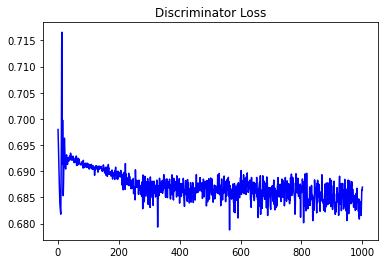

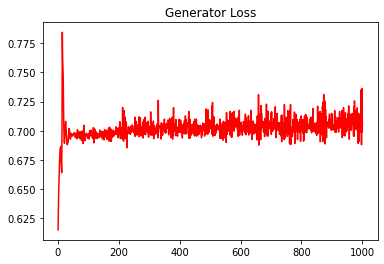

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19663834710170966


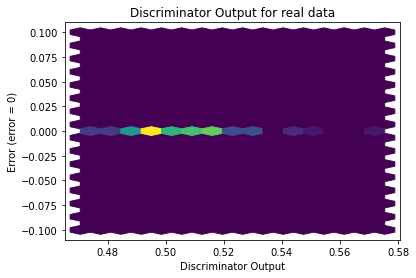

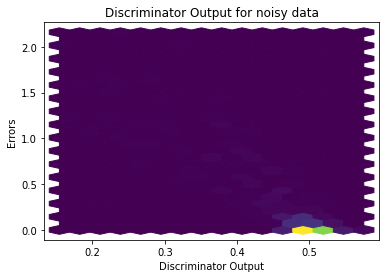

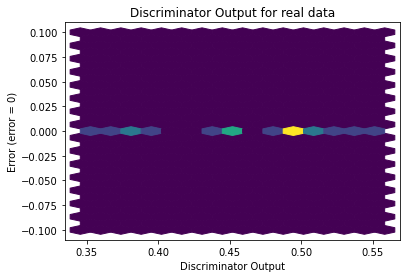

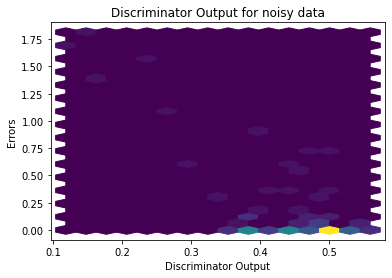

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


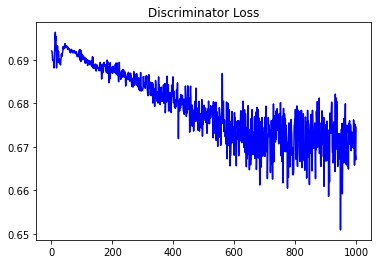

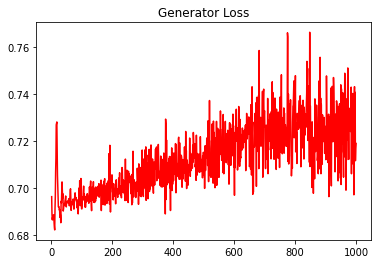

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22369305292038075


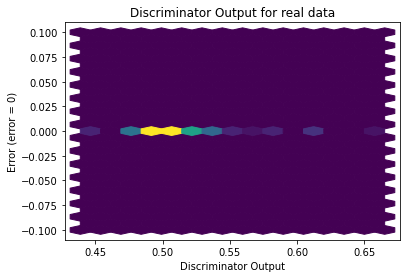

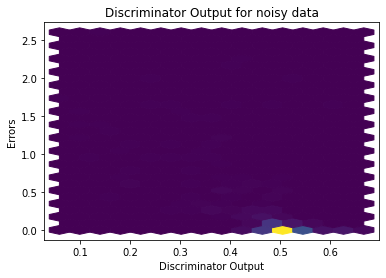

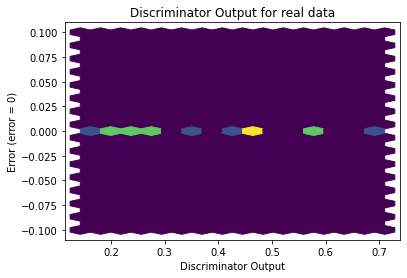

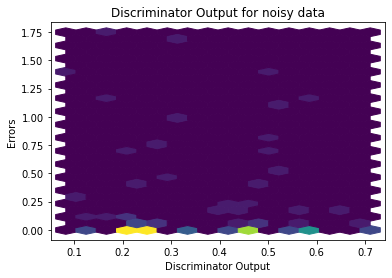

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7709]], requires_grad=True)
